# Looping to make a new map
Unfortunately or fortunately, I am focusing on transportation barriers so the graph that I want to make revolves around driving distance which is just like the example in class. I will try to spice it up a little bit but the first buncha steps are going to be the same.

In [1]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

# for interactive webmaps
import folium

In [2]:
latlon = [33.9900961283353, -118.31828084304271] # Already Centered on the best park in District 2 according to our metrics: Van Ness Park
network_type = 'drive' # Change network type because I am focusing on transportation
trip_times = [5, 10, 15, 20] #in minutes, 
meters_per_minute = 670 # travel distance per minute for a car going 25 mph

In [3]:
G = ox.graph_from_point(latlon, network_type=network_type, dist = 4000) # expand bc im in a car

In [4]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [5]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [6]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13175960.377431573
4022645.6753998804
-13166301.519173913
4032297.3654012345


In [7]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13171130.948302742
4027471.5204005577


In [8]:
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x) # Defining this for later, just as the park center

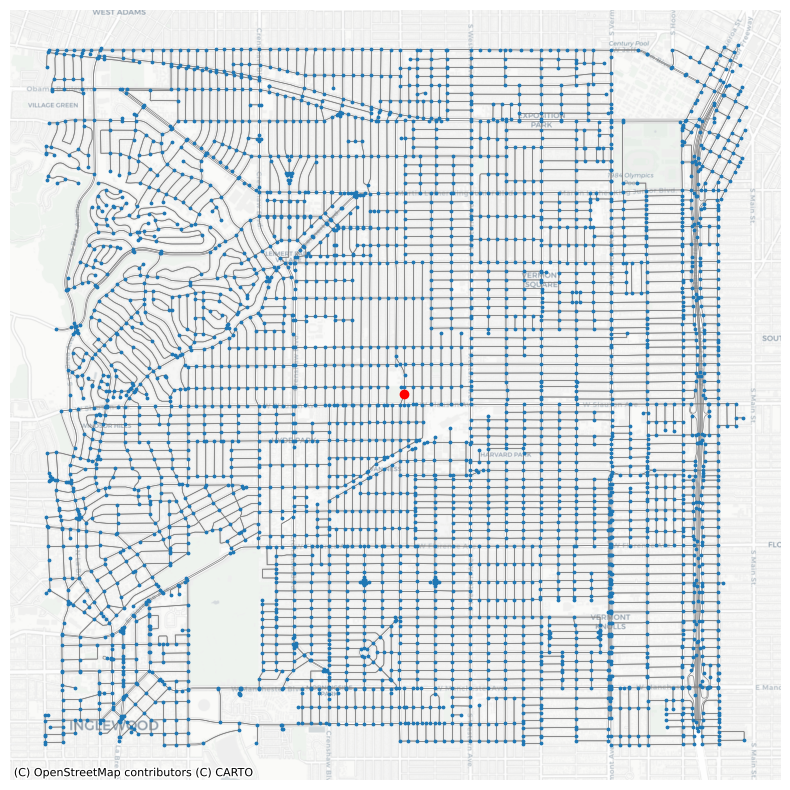

In [9]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5, # don't do more than 1
               edgecolor='gray', # line color
               zorder=10) #3D position (layers)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=3, 
               zorder=20) #this is higher so goes over the lines

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30) # top-most layers

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

# post note: that worked out well because the centroid is focused on the parking lot entrance to the park, where drivers would access it. 

In [10]:
gdf_edges['drive_time'] = gdf_edges['length']/meters_per_minute

In [11]:
gdf_edges[['osmid','name','highway','length','drive_time']].sample(15)

osmid  \
u          v          key                                      
123335068  122572234  0                            165665960   
1732243865 1788096927 0               [399276912, 399276933]   
123156513  123184144  0                [13456426, 817114847]   
122670366  122883934  0                            165568128   
1718644150 122752854  0                            159759780   
123058744  122935804  0                            165344383   
123451117  123633214  0                            509313137   
122883771  2627775993 0                             13401159   
1773051539 123362814  0                           1091731586   
122850441  1773026020 0                            165772582   
122728957  123338937  0                             13450234   
7839886102 123116313  0    [398239874, 840172802, 398239869]   
123295205  123201609  0                             13398731   
6814958416 6814958429 0                            165568046   
4015372461 123112726  0                            398803847   

                                             name      highway   length  \
u          v          key                                                 
123335068  122572234  0               11th Avenue  residential  205.781   
1732243865 1788096927 0     South Figueroa Street    secondary   94.282   
123156513  123184144  0          West 52nd Street  residential  113.201   
122670366  122883934  0           Wellington Road  residential  303.058   
1718644150 122752854  0          Northridge Drive     tertiary  227.062   
123058744  122935804  0      South Budlong Avenue  residential   98.850   
123451117  123633214  0          West 52nd Street  residential  104.844   
122883771  2627775993 0    South Grevillea Avenue     tertiary   24.927   
1773051539 123362814  0       Santa Rosalia Drive     tertiary  118.233   
122850441  1773026020 0               Coco Avenue  residential  246.385   
122728957  123338937  0           West 84th Place  residential  201.977   
7839886102 123116313  0         Leimert Boulevard      primary   59.393   
123295205  123201609  0            Orchard Avenue  residential  321.144   
6814958416 6814958429 0          West 35th Street  residential  200.211   
4015372461 123112726  0      South Vermont Avenue      primary   59.817   

                           drive_time  
u          v          key              
123335068  122572234  0      0.307136  
1732243865 1788096927 0      0.140719  
123156513  123184144  0      0.168957  
122670366  122883934  0      0.452325  
1718644150 122752854  0      0.338899  
123058744  122935804  0      0.147537  
123451117  123633214  0      0.156484  
122883771  2627775993 0      0.037204  
1773051539 123362814  0      0.176467  
122850441  1773026020 0      0.367739  
122728957  123338937  0      0.301458  
7839886102 123116313  0      0.088646  
123295205  123201609  0      0.479319  
6814958416 6814958429 0      0.298822  
4015372461 123112726  0      0.089279

## I get it now.
It took me a while to understand this but I get it. The drive_time is a function of the length of the edges, not the time to get to the centroid. I have to say it again so I don't forget.

In [12]:
cmap = 'RdYlGn'

In [13]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap=cmap, 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#a50026', '#fdbf6f', '#b7e075', '#006837']


In [14]:
iso_colors.reverse()
iso_colors

['#006837', '#b7e075', '#fdbf6f', '#a50026']

In [15]:
time_color = list(zip(trip_times, iso_colors))
time_color

[(5, '#006837'), (10, '#b7e075'), (15, '#fdbf6f'), (20, '#a50026')]

In [16]:
for time,color in list(time_color):
    print('The color for a '+str(time)+' minute drive is ' + color) # change this a tiny bit for grammer

The color for a 5 minute drive is #006837
The color for a 10 minute drive is #b7e075
The color for a 15 minute drive is #fdbf6f
The color for a 20 minute drive is #a50026


In [17]:
time_color.reverse()
time_color

[(20, '#a50026'), (15, '#fdbf6f'), (10, '#b7e075'), (5, '#006837')]

In [18]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time,distance='time') #centernode is the park, defined earlier 

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' a minute drive ' + color)
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = time
        gdf_nodes.loc[node,'color'] = color

There are 1223 nodes within 20 a minute drive #a50026
There are 622 nodes within 15 a minute drive #fdbf6f
There are 221 nodes within 10 a minute drive #b7e075
There are 51 nodes within 5 a minute drive #006837


In [19]:
gdf_nodes.sample(10)

y             x  street_count         lon        lat  \
osmid                                                                         
123322453   4.025392e+06 -1.316888e+07             4 -118.298094  33.974599   
4020239858  4.023091e+06 -1.316717e+07             3 -118.282704  33.957458   
122819793   4.028206e+06 -1.317390e+07             4 -118.343161  33.995560   
123423235   4.023558e+06 -1.317263e+07             3 -118.331710  33.960938   
123182847   4.025629e+06 -1.316790e+07             4 -118.289240  33.976369   
123141698   4.023296e+06 -1.316961e+07             4 -118.304663  33.958983   
1773954447  4.027434e+06 -1.317480e+07             3 -118.351234  33.989811   
122991358   4.029540e+06 -1.317036e+07             4 -118.311347  34.005494   
122753175   4.026002e+06 -1.316961e+07             4 -118.304595  33.979141   
1732243546  4.030175e+06 -1.316836e+07             3 -118.293355  34.010222   

           highway  ref                           geometry  time    color  
osmid                                                                      
123322453      NaN  NaN  POINT (-13168883.586 4025391.789)   NaN      nan  
4020239858     NaN  NaN  POINT (-13167170.401 4023091.064)   NaN      nan  
122819793      NaN  NaN  POINT (-13173900.388 4028205.818)   NaN      nan  
123423235     stop  NaN  POINT (-13172625.646 4023558.159)   NaN      nan  
123182847      NaN  NaN  POINT (-13167897.941 4025629.375)   NaN      nan  
123141698      NaN  NaN  POINT (-13169614.821 4023295.801)   NaN      nan  
1773954447     NaN  NaN  POINT (-13174799.126 4027433.948)   NaN      nan  
122991358      NaN  NaN  POINT (-13170358.948 4029539.814)  10.0  #b7e075  
122753175      NaN  NaN  POINT (-13169607.274 4026001.583)  20.0  #a50026  
1732243546     NaN  NaN  POINT (-13168356.076 4030174.660)   NaN      nan

In [20]:
import numpy as np
gdf_nodes['color'] = gdf_nodes['color'].replace('nan', np.nan)
gdf_nodes = gdf_nodes.dropna(subset=['color'])
gdf_nodes

y             x  street_count         lon        lat  \
osmid                                                                         
21098536    4.026413e+06 -1.316815e+07             4 -118.291497  33.982202   
123058770   4.026431e+06 -1.316863e+07             4 -118.295856  33.982343   
21302797    4.030260e+06 -1.316912e+07             4 -118.300193  34.010856   
122609835   4.030257e+06 -1.316924e+07             4 -118.301270  34.010836   
21306015    4.031281e+06 -1.317009e+07             4 -118.308913  34.018463   
...                  ...           ...           ...         ...        ...   
6032596006  4.024916e+06 -1.317057e+07             3 -118.313238  33.971051   
6032596008  4.024914e+06 -1.317060e+07             3 -118.313522  33.971040   
6032596010  4.024885e+06 -1.317060e+07             3 -118.313526  33.970820   
6032596012  4.024884e+06 -1.317057e+07             3 -118.313254  33.970813   
7556756888  4.026754e+06 -1.317253e+07             3 -118.330867  33.984750   

                    highway  ref                           geometry  time  \
osmid                                                                       
21098536    traffic_signals  NaN  POINT (-13168149.200 4026412.507)  20.0   
123058770   traffic_signals  NaN  POINT (-13168634.419 4026431.382)  20.0   
21302797    traffic_signals  NaN  POINT (-13169117.268 4030259.815)  20.0   
122609835               NaN  NaN  POINT (-13169237.137 4030257.116)  20.0   
21306015                NaN  NaN  POINT (-13170087.951 4031281.412)  20.0   
...                     ...  ...                                ...   ...   
6032596006              NaN  NaN  POINT (-13170569.386 4024915.518)  20.0   
6032596008              NaN  NaN  POINT (-13170601.001 4024914.095)  20.0   
6032596010              NaN  NaN  POINT (-13170601.502 4024884.591)  20.0   
6032596012              NaN  NaN  POINT (-13170571.167 4024883.544)  20.0   
7556756888              NaN  NaN  POINT (-13172531.815 4026754.467)  20.0   

              color  
osmid                
21098536    #a50026  
123058770   #a50026  
21302797    #a50026  
122609835   #a50026  
21306015    #a50026  
...             ...  
6032596006  #a50026  
6032596008  #a50026  
6032596010  #a50026  
6032596012  #a50026  
7556756888  #a50026  

[1223 rows x 10 columns]

In [21]:
isochrones = gdf_nodes.dissolve(by = "time")
isochrones
# make the polygons by the time intervals

geometry             y  \
time                                                                    
5.0   MULTIPOINT ((-13171388.508 4027093.538), (-131...  4.027586e+06   
10.0  MULTIPOINT ((-13171971.288 4027579.754), (-131...  4.027344e+06   
15.0  MULTIPOINT ((-13172769.482 4027084.462), (-131...  4.031316e+06   
20.0  MULTIPOINT ((-13173990.880 4027073.225), (-131...  4.026413e+06   

                 x  street_count         lon        lat          highway  \
time                                                                       
5.0  -1.317124e+07             3 -118.319301  33.990943  traffic_signals   
10.0 -1.317009e+07             4 -118.308957  33.989138  traffic_signals   
15.0 -1.317094e+07             3 -118.316601  34.018721  traffic_signals   
20.0 -1.316815e+07             4 -118.291497  33.982202  traffic_signals   

       ref    color  
time                 
5.0   None  #006837  
10.0  None  #b7e075  
15.0  None  #fdbf6f  
20.0  None  #a50026

In [22]:
isochrones = isochrones.convex_hull.reset_index(name='geometry')
isochrones
# make the polygon outta the nodes

time                                           geometry
0   5.0  POLYGON ((-13171066.494 4026566.651, -13171174...
1  10.0  POLYGON ((-13171180.396 4025388.661, -13171291...
2  15.0  POLYGON ((-13171070.580 4024774.618, -13171801...
3  20.0  POLYGON ((-13170829.117 4024288.642, -13171314...

In [23]:
isochrones.sort_values(by='time', ascending=False,inplace=True)
isochrones.rename(columns={'time': 'Drive Time (min)'}, inplace=True)
isochrones

Drive Time (min)                                           geometry
3              20.0  POLYGON ((-13170829.117 4024288.642, -13171314...
2              15.0  POLYGON ((-13171070.580 4024774.618, -13171801...
1              10.0  POLYGON ((-13171180.396 4025388.661, -13171291...
0               5.0  POLYGON ((-13171066.494 4026566.651, -13171174...

# Add in other datasets

In [24]:
import pandas as pd 
import geopandas as gpd

In [25]:
Income = pd.read_excel(
    'Data/Income-Data.xlsx',
    dtype=
    {
        'GEO_ID':str,
    }
)
Income = Income.drop([0])
Income.info

<bound method DataFrame.info of       Geometry       GEO_ID  Less_10k  10k_to_14999  15k_to_19999  20k_24999  \
1     1400000U  06037101110        54           126            49         33   
2     1400000U  06037101122        88             0             7         42   
3     1400000U  06037101220        78            82            28        102   
4     1400000U  06037101221        76           107           118        148   
5     1400000U  06037101222       161           167            34         41   
...        ...          ...       ...           ...           ...        ...   
2494  1400000U  06037980038         0             0             0          0   
2495  1400000U  06037980039         0             0             0          0   
2496  1400000U  06037990100         0             0             0          0   
2497  1400000U  06037990200         0             0             0          0   
2498  1400000U  06037990300         0             0             0          0   

      2

In [26]:
Tracts = gpd.read_file('Data/tl_2021_06_tract.zip')

Tracts1 = Tracts[['GEOID','geometry']]
Tracts1.columns = ['GEO_ID',
'geometry']
Tracts1.head()

GEO_ID                                           geometry
0  06085504321  POLYGON ((-121.87556 37.39924, -121.87535 37.3...
1  06085504410  POLYGON ((-121.88886 37.40758, -121.88576 37.4...
2  06085507003  POLYGON ((-122.02489 37.21683, -122.02459 37.2...
3  06085507004  POLYGON ((-121.99304 37.22562, -121.99249 37.2...
4  06085502204  POLYGON ((-121.93167 37.29803, -121.92801 37.3...

In [27]:
District2 = pd.read_excel('Data/District2.xlsx',
    dtype =
    {
        'CT20':str,
    }
)
District2['GEO_ID'] = '06' + '037' + District2['CT20']
District2.head()

OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0          640           2         640  211000  2110.00  2ND SUP. DISTRICT   
1          641           2         641  211121  2111.21  2ND SUP. DISTRICT   
2          642           3         642  211122  2111.22  2ND SUP. DISTRICT   
3          643           2         643  211123  2111.23  2ND SUP. DISTRICT   
4          644           2         644  211124  2111.24  2ND SUP. DISTRICT   

                       SUP_NAME  DIST_SUP CITYNAME_ALF NAME_1  \
0  2ND DISTRICT: HOLLY MITCHELL         2  LOS ANGELES    NaN   
1  2ND DISTRICT: HOLLY MITCHELL         2  LOS ANGELES    NaN   
2  2ND DISTRICT: HOLLY MITCHELL         2  LOS ANGELES    NaN   
3  2ND DISTRICT: HOLLY MITCHELL         2  LOS ANGELES    NaN   
4  2ND DISTRICT: HOLLY MITCHELL         2  LOS ANGELES    NaN   

        JURISDICTION  AREA_NUM               AREA_NAME   Shape__Area  \
0  INCORPORATED CITY         5  Westside Planning Area  3.881413e+06   
1  INCORPORATED CITY         9     Metro Planning Area  3.125745e+05   
2  INCORPORATED CITY         9     Metro Planning Area  5.341218e+05   
3  INCORPORATED CITY         9     Metro Planning Area  2.513022e+05   
4  INCORPORATED CITY         9     Metro Planning Area  5.771177e+05   

   Shape__Length       GEO_ID  
0    9270.888577  06037211000  
1    2799.117227  06037211121  
2    3050.487937  06037211122  
3    2501.035059  06037211123  
4    3012.923477  06037211124

In [28]:
District2Tracts=Tracts1.merge(District2,on="GEO_ID")
District2Tracts.head()

GEO_ID                                           geometry  \
0  06037541605  POLYGON ((-118.21630 33.90339, -118.21538 33.9...   
1  06037542000  POLYGON ((-118.20734 33.90732, -118.20733 33.9...   
2  06037542401  POLYGON ((-118.21998 33.89600, -118.21985 33.8...   
3  06037542402  POLYGON ((-118.21883 33.88859, -118.21868 33.8...   
4  06037542502  POLYGON ((-118.23599 33.89591, -118.23571 33.8...   

   OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0         1791           1        1791  541605  5416.05  2ND SUP. DISTRICT   
1         1796           2        1796  542000  5420.00  2ND SUP. DISTRICT   
2         1802           1        1802  542401  5424.01  2ND SUP. DISTRICT   
3         1803           2        1803  542402  5424.02  2ND SUP. DISTRICT   
4         1805           1        1805  542502  5425.02  2ND SUP. DISTRICT   

                       SUP_NAME  DIST_SUP CITYNAME_ALF                 NAME_1  \
0  2ND DISTRICT: HOLLY MITCHELL         2      COMPTON                    NaN   
1  2ND DISTRICT: HOLLY MITCHELL         2      COMPTON  EAST RANCHO DOMINGUEZ   
2  2ND DISTRICT: HOLLY MITCHELL         2      COMPTON                    NaN   
3  2ND DISTRICT: HOLLY MITCHELL         2      COMPTON                    NaN   
4  2ND DISTRICT: HOLLY MITCHELL         2      COMPTON                    NaN   

                  JURISDICTION  AREA_NUM            AREA_NAME   Shape__Area  \
0            INCORPORATED CITY         9  Metro Planning Area  1.270111e+06   
1  INCORPORATED/UNINCORPORATED         9  Metro Planning Area  1.417641e+06   
2            INCORPORATED CITY         9  Metro Planning Area  1.881859e+06   
3            INCORPORATED CITY         9  Metro Planning Area  2.423799e+06   
4            INCORPORATED CITY         9  Metro Planning Area  1.447622e+06   

   Shape__Length  
0    5153.474133  
1    5127.847215  
2    5783.777118  
3    8444.461398  
4    5218.654088

In [29]:
District2TractsGEO=District2Tracts.merge(Income,on="GEO_ID")
District2TractsGEO.head()

GEO_ID                                           geometry  \
0  06037541605  POLYGON ((-118.21630 33.90339, -118.21538 33.9...   
1  06037542000  POLYGON ((-118.20734 33.90732, -118.20733 33.9...   
2  06037542401  POLYGON ((-118.21998 33.89600, -118.21985 33.8...   
3  06037542402  POLYGON ((-118.21883 33.88859, -118.21868 33.8...   
4  06037542502  POLYGON ((-118.23599 33.89591, -118.23571 33.8...   

   OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0         1791           1        1791  541605  5416.05  2ND SUP. DISTRICT   
1         1796           2        1796  542000  5420.00  2ND SUP. DISTRICT   
2         1802           1        1802  542401  5424.01  2ND SUP. DISTRICT   
3         1803           2        1803  542402  5424.02  2ND SUP. DISTRICT   
4         1805           1        1805  542502  5425.02  2ND SUP. DISTRICT   

                       SUP_NAME  DIST_SUP  ... 35k_39999 40k_to_44999  \
0  2ND DISTRICT: HOLLY MITCHELL         2  ...       101           91   
1  2ND DISTRICT: HOLLY MITCHELL         2  ...        13           55   
2  2ND DISTRICT: HOLLY MITCHELL         2  ...        21           69   
3  2ND DISTRICT: HOLLY MITCHELL         2  ...        47           74   
4  2ND DISTRICT: HOLLY MITCHELL         2  ...        51           87   

  45k_to_49999  50k_to_59999 60k_to_74999  75k_to_99999  100k_to_124999  \
0           32           251           92           186             153   
1           72           119          146           289              32   
2           54           142          106           215             179   
3           17            46          149           135             118   
4           57            30          211           238              50   

  125k_to_149999  150k_to_199999  200k_plus  
0             98              11         27  
1             99             120         33  
2             63              21         38  
3            142              45         11  
4             10              57         10  

[5 rows x 34 columns]

In [30]:
VulnerableCar = pd.read_excel('Data/Transport.xlsx',
 dtype =
    {
        'TRACT':str,
    }
)
VulnerableCar['GEO_ID'] = '06' + '037' + VulnerableCar['TRACT']
VulnerableCar.head()

TRACT  D2_Transp    atmbl_p       GEO_ID
0  101110          2  53.753368  06037101110
1  101122          1  98.986270  06037101122
2  101210          1  28.538432  06037101210
3  101220          2  16.745798  06037101220
4  101300          2  59.707430  06037101300

In [31]:
District2VulnerableCar=District2TractsGEO.merge(VulnerableCar,on="GEO_ID")
District2VulnerableCar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   GEO_ID          407 non-null    object  
 1   geometry        407 non-null    geometry
 2   OBJECTID_12     407 non-null    int64   
 3   Join_Count      407 non-null    int64   
 4   TARGET_FID      407 non-null    int64   
 5   CT20            407 non-null    object  
 6   LABEL           407 non-null    float64 
 7   NAME            407 non-null    object  
 8   SUP_NAME        407 non-null    object  
 9   DIST_SUP        407 non-null    int64   
 10  CITYNAME_ALF    361 non-null    object  
 11  NAME_1          55 non-null     object  
 12  JURISDICTION    407 non-null    object  
 13  AREA_NUM        407 non-null    int64   
 14  AREA_NAME       407 non-null    object  
 15  Shape__Area     407 non-null    float64 
 16  Shape__Length   407 non-null    float64 
 17  Geometry

In [32]:
m = folium.Map(location=latlon,zoom_start=13, tiles='Cartodb Positron')

folium.Choropleth(
    geo_data=District2VulnerableCar,
    data=District2VulnerableCar,
    key_on='feature.properties.GEO_ID',
    columns=['GEO_ID','D2_Transp'],
    fill_color='RdBu_r',
    line_weight=0.1, 
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)  

isochrones.explore(m=m,column='Drive Time (min)',color='iso_colors',cmap=cmap,opacity=0.8,categorical=True)

gdf_nodes.explore(m=m,column='time')

title_html = '<h3 align="center" style="font-size:20px"><b>Transportation Barriers overlayed with a 20 Minute drive radius around Van Ness Park in District 2</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

m